# Loading and using the models

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import pickle
import lightgbm as lgbm
from astropy.visualization import hist
from scipy.stats import gaussian_kde

### Choosing the galaxy property

In [2]:
prop = 'stellar_mass'

### Loading data

In [3]:
df = pd.read_csv('../data/IllutrisTNG300-1.csv')

### Selecting the data

In [4]:
#RAW and SMOGN
data = np.array([df['M_h'], df['C_h'], df['S_h'], df['z_h'], df['Delta3_h']]).T
target = np.array([df[prop]]).T[:, 0]
data.shape, target.shape

((69811, 5), (69811,))

Our values to pre-processing the data to each model predictions:

In [28]:
#RAW
mean_data = np.array([11.56402166,  1.01631081,  0.04940789,  1.32597217,  2.96404967])
std_data = np.array([0.46291709, 0.15845161, 0.02893565, 0.6149362 , 2.88140351])

In [6]:
#SMOGN
if prop == 'stellar_mass':
    smean_data = np.array([12.08988322,  0.96981207,  0.0484409 ,  1.15586052,  3.46919684])
    sstd_data = np.array([0.68459218, 0.13999286, 0.02498792, 0.54413158, 2.78418432])
if prop == 'sSFR':
    smean_data = np.array([12.09845522,  0.97470878,  0.0452499 ,  1.1964297 ,  3.63642092])
    sstd_data = np.array([0.73929436, 0.14428435, 0.02485517, 0.54914671, 3.10866801])
if prop == 'radius':
    smean_data = np.array([11.90761788,  0.96218741,  0.0480215 ,  1.21677272,  5.55186565])
    sstd_data = np.array([1.04396384, 0.19356816, 0.02761298, 0.65083726, 8.26418729])
if prop == 'color':
    smean_data = np.array([11.34179992,  1.0561077 ,  0.04781581,  1.30217413,  2.99269429])
    sstd_data = np.array([0.40980921, 0.14630491, 0.02538269, 0.52672644, 2.36102014])

In [7]:
sdata = np.copy(data)

In [8]:
#RAW
data -= mean_data
data /= std_data
#SMOGN
sdata -= smean_data
sdata /= sstd_data

### Loading the models

In [9]:
#Raw
raw_NN = load_model('../models/'+prop+'/raw-NN.h5')
raw_kNN = pickle.load(open('../models/'+prop+'/raw-kNN.sav', 'rb'))
raw_LGBM = lgbm.Booster(model_file = '../models/'+prop+'/raw-LGBM.txt')
raw_ERT = pickle.load(open('../models/'+prop+'/raw-ERT.pkl', 'rb'))
raw_stacked = pickle.load(open('../models/'+prop+'/raw-stacked.sav', 'rb'))
#SMOGN
SMOGN_NN = load_model('../models/'+prop+'/SMOGN-NN.h5')
SMOGN_kNN = pickle.load(open('../models/'+prop+'/SMOGN-kNN.sav', 'rb'))
SMOGN_LGBM = lgbm.Booster(model_file = '../models/'+prop+'/SMOGN-LGBM.txt')
SMOGN_ERT = pickle.load(open('../models/'+prop+'/SMOGN-ERT.pkl', 'rb'))
SMOGN_stacked = pickle.load(open('../models/'+prop+'/SMOGN-stacked.sav', 'rb'))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator KNeighborsRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid resul

#### To get information about the used hyperparameters, use:

In [10]:
#NN
raw_NN.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 5),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_12_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_12',
    'trainable': True,
    'batch_input_shape': (None, 5),
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_13',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias

In [11]:
#kNN
raw_kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 1,
 'weights': 'uniform'}

In [12]:
##LGBM
#raw_LGBM.dump_model()

In [13]:
##ERT
#raw_ERT.get_params()

In [14]:
#Stacked
raw_stacked.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### Predictions for each ML model individualy

In [15]:
#RAW
pred_raw_NN = raw_NN.predict(data)
pred_raw_kNN = raw_kNN.predict(data)
pred_raw_LGBM = raw_LGBM.predict(data)
pred_raw_ERT = raw_ERT.predict(data)
#SMOGN
pred_SMOGN_NN = SMOGN_NN.predict(sdata)
pred_SMOGN_kNN = SMOGN_kNN.predict(sdata)
pred_SMOGN_LGBM = SMOGN_LGBM.predict(sdata)
pred_SMOGN_ERT = SMOGN_ERT.predict(sdata)

### PDF comparison

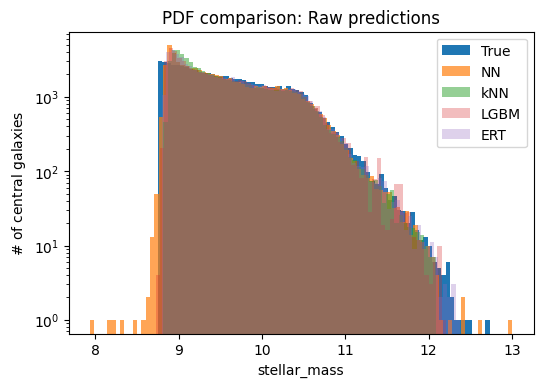

In [16]:
#RAW
plt.figure(dpi = 100)
hist(target, bins = 'scott', label = 'True')
hist(pred_raw_NN, bins = 'scott', alpha = 0.7, label = 'NN')
hist(pred_raw_kNN, bins = 'scott', alpha = 0.5, label = 'kNN')
hist(pred_raw_LGBM, bins = 'scott', alpha = 0.3, label = 'LGBM')
hist(pred_raw_ERT, bins = 'scott', alpha = 0.3, label = 'ERT')
plt.yscale('log')
plt.legend()
plt.ylabel(r'$\#$ of central galaxies')
plt.xlabel(prop)
plt.title('PDF comparison: Raw predictions')

plt.savefig(f'../results/PDF_raw-{prop}.png')

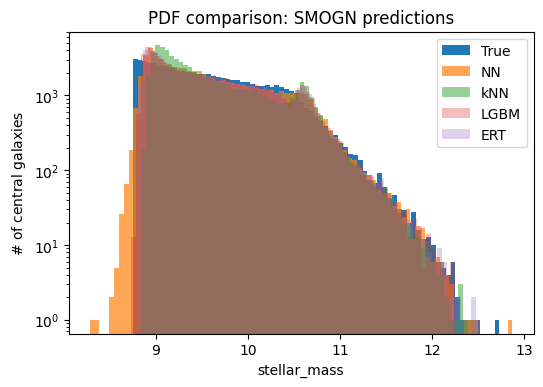

In [17]:
#SMOGN
plt.figure(dpi = 100)
hist(target, bins = 'scott', label = 'True')
hist(pred_SMOGN_NN, bins = 'scott', alpha = 0.7, label = 'NN')
hist(pred_SMOGN_kNN, bins = 'scott', alpha = 0.5, label = 'kNN')
hist(pred_SMOGN_LGBM, bins = 'scott', alpha = 0.3, label = 'LGBM')
hist(pred_SMOGN_ERT, bins = 'scott', alpha = 0.3, label = 'ERT')
plt.yscale('log')
plt.legend()
plt.ylabel(r'$\#$ of central galaxies')
plt.xlabel(prop)
plt.title('PDF comparison: SMOGN predictions')

plt.savefig(f'../results/PDF_SMOGN-{prop}.png')

### Pre-processing data do stacked models

Our values to pre-processing the data, for the stacked predictions:

In [18]:
#RAW and SMOGN
data = np.array([df['M_h'], df['C_h'], df['S_h'], df['z_h'], df['Delta3_h']]).T
target = np.array([df[prop]]).T[:, 0]
data.shape, target.shape

((69811, 5), (69811,))

In [19]:
#RAW
mean_data = np.array([11.56844771,  1.01621298,  0.04914343,  1.33252884,  2.96807919])
std_data = np.array([0.46985996, 0.14020349, 0.02759345, 0.62300378, 2.86084274])

In [20]:
#SMOGN
if prop == 'stellar_mass':
    smean_data = np.array([12.08988322,  0.96981207,  0.0484409 ,  1.15586052,  3.46919684])
    sstd_data = np.array([0.68459218, 0.13999286, 0.02498792, 0.54413158, 2.78418432])
if prop == 'sSFR':
    smean_data = np.array([12.09845522,  0.97470878,  0.0452499 ,  1.1964297 ,  3.63642092])
    sstd_data = np.array([0.73929436, 0.14428435, 0.02485517, 0.54914671, 3.10866801])
if prop == 'radius':
    smean_data = np.array([11.8926449 ,  0.96278193,  0.04793351,  1.21513446,  5.40132796])
    sstd_data = np.array([1.02686488, 0.19323602, 0.02708772, 0.64644288, 8.07685982])
if prop == 'color':
    smean_data = np.array([11.34179992,  1.0561077 ,  0.04781581,  1.30217413,  2.99269429])
    sstd_data = np.array([0.40980921, 0.14630491, 0.02538269, 0.52672644, 2.36102014])

In [21]:
sdata = np.copy(data)

In [22]:
#RAW
data -= mean_data
data /= std_data
#SMOGN
sdata -= smean_data
sdata /= sstd_data

In [23]:
#RAW
pred_raw_NN = raw_NN.predict(data)
pred_raw_kNN = raw_kNN.predict(data)
pred_raw_LGBM = raw_LGBM.predict(data)
pred_raw_ERT = raw_ERT.predict(data)
#SMOGN
pred_SMOGN_NN = SMOGN_NN.predict(sdata)
pred_SMOGN_kNN = SMOGN_kNN.predict(sdata)
pred_SMOGN_LGBM = SMOGN_LGBM.predict(sdata)
pred_SMOGN_ERT = SMOGN_ERT.predict(sdata)

### Data for the stacked models

In [24]:
data_stacked_raw = np.array([pred_raw_NN[:,0], pred_raw_kNN, pred_raw_LGBM, pred_raw_ERT]).T
data_stacked_SMOGN = np.array([pred_SMOGN_NN[:,0], pred_SMOGN_kNN, pred_SMOGN_LGBM, pred_SMOGN_ERT]).T

### Predictions for the stacked models

In [25]:
pred_raw_stacked = raw_stacked.predict(data_stacked_raw)
pred_SMOGN_stacked = SMOGN_stacked.predict(data_stacked_SMOGN)

### PDF comparison for the stacked models

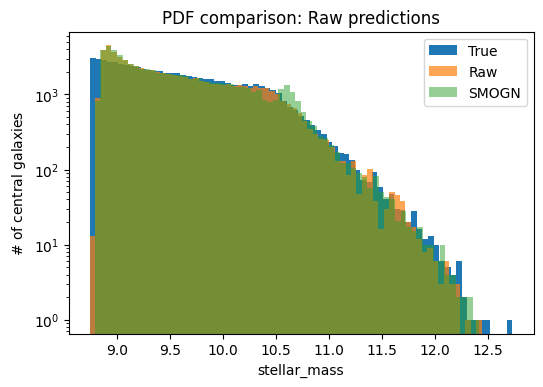

In [26]:
plt.figure(dpi = 100)
hist(target, bins = 'scott', label = 'True')
hist(pred_raw_stacked, bins = 'scott', alpha = 0.7, label = 'Raw')
hist(pred_SMOGN_stacked, bins = 'scott', alpha = 0.5, label = 'SMOGN')
plt.yscale('log')
plt.legend()
plt.ylabel(r'$\#$ of central galaxies')
plt.xlabel(prop)
plt.title('PDF comparison: Raw predictions')

plt.savefig(f'../results/PDF_stacked-{prop}.png')

### Linear $\times$ linear comparison

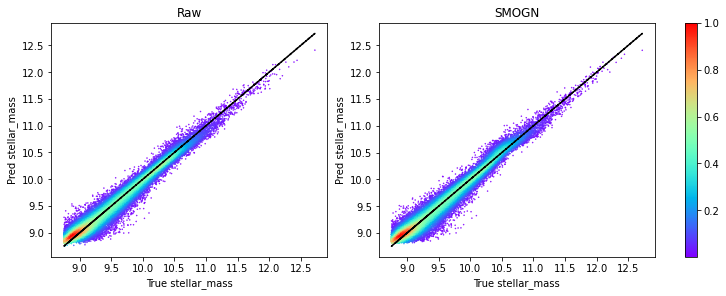

In [27]:
N = 30000

fig, axs = plt.subplots(1, 2, figsize = (10, 4), constrained_layout=True)

x = target[:N]
y = pred_raw_stacked[:N]
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
axs[0].plot(target[:N], target[:N], '--k', label = r'True $\times$ True')
im00 = axs[0].scatter(x, y, c = z/max(z), s = 1, cmap = 'rainbow', marker = '.')
axs[0].set_ylabel('Pred '+prop)
axs[0].set_xlabel('True '+prop)
axs[0].set_title('Raw')

x = target[:N]
y = pred_SMOGN_stacked[:N]
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
axs[1].plot(target[:N], target[:N], '--k', label = r'True $\times$ True')
axs[1].scatter(x, y, c = z/max(z), s = 1, cmap = 'rainbow', marker = '.')
axs[1].set_ylabel('Pred '+ prop)
axs[1].set_xlabel('True '+ prop)
axs[1].set_title('SMOGN')

fig.colorbar(im00, ax = axs)

plt.savefig(f'../results/linear_comp-{prop}.png')